In [1183]:
import pandas as pd

data = pd.read_csv('heart.csv')
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [1184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy as np  # Import NumPy



heart_attack_data = pd.read_csv('heart.csv') 

# Separate features (X) and target variable (y)
X = heart_attack_data.drop('output', axis=1) 
y = heart_attack_data['output']


rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X, y)


importance = rf.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


top_features = feature_importance_df.head(10)['Feature'].tolist()

# Use SelectFromModel to select features
selector = SelectFromModel(rf, threshold=-np.inf, max_features=10)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]

selected_features
feature_importance_df

,Feature,Importance
2,cp,0.135346
7,thalachh,0.129879
11,caa,0.108091
12,thall,0.105813
9,oldpeak,0.102469
0,age,0.091921
4,chol,0.076270
3,trtbps,0.075079
8,exng,0.058675
10,slp,0.055157


In [1185]:
class_0_samples = data[data['age'] > 50].sample(n=10)   
class_1_samples = data[data['age'] <50].sample(n=10)  

In [1186]:
selected_features = ['cp', 'thalachh', 'caa'] 

In [1187]:
class_0_selected = class_0_samples[selected_features]
class_1_selected = class_1_samples[selected_features]

In [1188]:
print("Samples from class 0:")
print(class_0_selected)
print("\nSamples from class 1:")
print(class_1_selected)

Samples from class 0:
     cp  thalachh  caa
16    2       172    0
130   2       163    1
166   0       129    2
137   1       140    0
241   0       143    0
151   0       125    0
289   0       130    1
64    2       165    0
110   0       154    0
23    2       137    0

Samples from class 1:
     cp  thalachh  caa
56    0       186    0
100   3       178    2
87    1       156    0
74    2       165    0
171   1       168    0
230   2       152    0
280   0       125    0
18    0       171    0
212   0       140    0
98    2       162    1


In [1189]:
class_0_stats = class_0_samples[selected_features].agg(['mean', 'std', 'var'])  
class_1_stats = class_1_samples[selected_features].agg(['mean', 'std', 'var'])  


In [1190]:
print("Statistics for Class 0:")
print(class_0_stats)
print("\nStatistics for Class 1:")
print(class_1_stats)

Statistics for Class 0:
            cp    thalachh       caa
mean  0.900000  145.800000  0.400000
std   0.994429   16.671999  0.699206
var   0.988889  277.955556  0.488889

Statistics for Class 1:
            cp    thalachh       caa
mean  1.100000  160.300000  0.300000
std   1.100505   18.006480  0.674949
var   1.211111  324.233333  0.455556


In [1191]:
covariance_matrix_class_0 = class_0_selected.cov()

covariance_matrix_class_1 = class_1_selected.cov()
print("Covariance Matrix for Class 0:")
print(covariance_matrix_class_0)

print("\nCovariance Matrix for Class 1:")
print(covariance_matrix_class_1)

Covariance Matrix for Class 0:
                 cp    thalachh       caa
cp         0.988889   11.311111 -0.177778
thalachh  11.311111  277.955556 -3.577778
caa       -0.177778   -3.577778  0.488889

Covariance Matrix for Class 1:
                cp    thalachh       caa
cp        1.211111    5.855556  0.522222
thalachh  5.855556  324.233333  4.122222
caa       0.522222    4.122222  0.455556


In [1192]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = pd.concat([class_0_selected, class_1_selected], axis=0)  
y = [0] * len(class_0_selected) + [1] * len(class_1_selected) #TARGET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
predictions = lda.predict(X_test)
print(f"the test data: {y_test}")
print(f" classifing: {predictions}")


the test data: [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
 classifing: [1 1 0 1 0 0 1 0 0 0 1 0]


In [1193]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of LDA model: {accuracy}")


Accuracy of LDA model: 0.5833333333333334


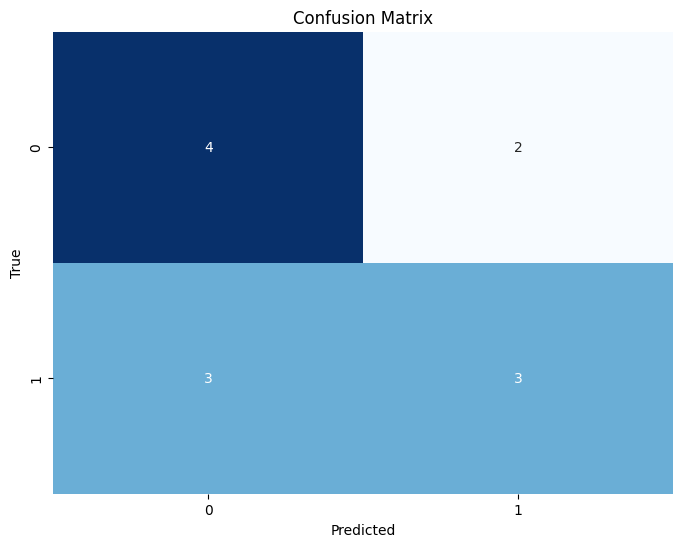

In [1194]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [1201]:
coef = lda.coef_
intercept = lda.intercept_
print(coef)
print(intercept)

[[-0.13086298  0.15703557  2.06763502]]
[-24.86396546]


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


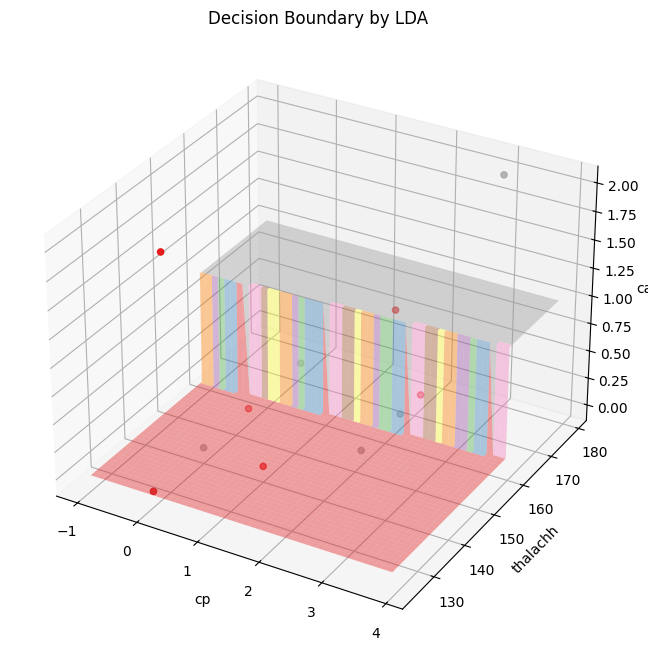

In [1222]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['cp'], X_test['thalachh'], X_test['caa'], c=y_test, cmap='Set1')

x_min, x_max = X_test['cp'].min() - 1, X_test['cp'].max() + 1
y_min, y_max = X_test['thalachh'].min() - 1, X_test['thalachh'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(yy.ravel())])
Z = Z.reshape(xx.shape)
ax.plot_surface(xx, yy, Z, alpha=0.4, cmap='Set1')

ax.set_xlabel('cp')
ax.set_ylabel('thalachh')
ax.set_zlabel('caa')
ax.set_title('Decision Boundary by LDA')

plt.show()

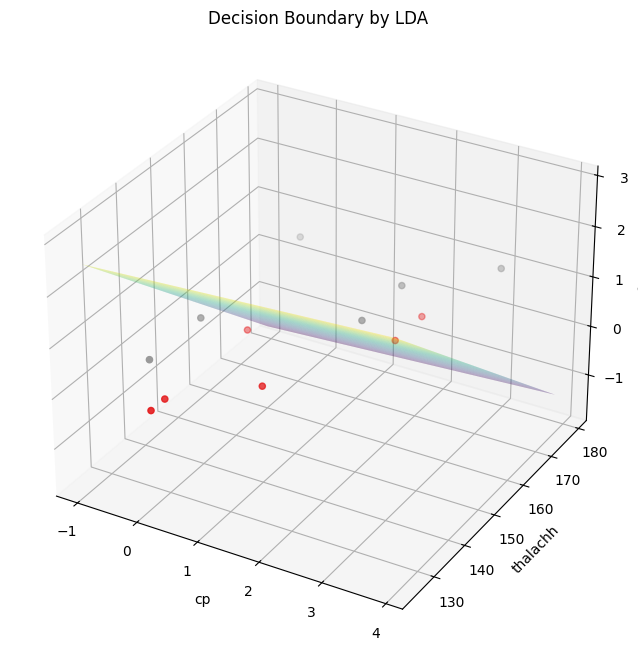

In [1225]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['cp'], X_test['thalachh'], y_test, c=y_test, cmap='Set1')

x_min, x_max = X_test['cp'].min() - 1, X_test['cp'].max() + 1
y_min, y_max = X_test['thalachh'].min() - 1, X_test['thalachh'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = -(intercept[0] + coef[0][0] * xx + coef[0][1] * yy) / coef[0][2]

ax.plot_surface(xx, yy, Z, alpha=0.4, cmap='viridis')

ax.set_xlabel('cp')
ax.set_ylabel('thalachh')
ax.set_zlabel('caa')
ax.set_title('Decision Boundary by LDA')

plt.show()


In [1226]:
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

data = pd.read_csv('train.csv')  
X = pd.concat([class_0_selected, class_1_selected], axis=0)   
num_samples_class_0 = len(class_0_selected)
num_samples_class_1 = len(class_1_selected)
y = [0] * num_samples_class_0 + [1] * num_samples_class_1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train, y_train)
predictions = nearest_centroid.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of Nearest Centroid classifier: {accuracy}")



Accuracy of Nearest Centroid classifier: 0.5833333333333334


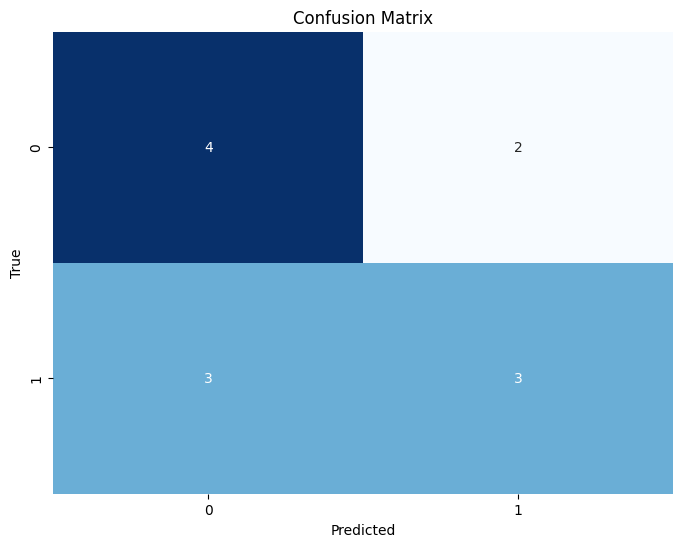

In [1231]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

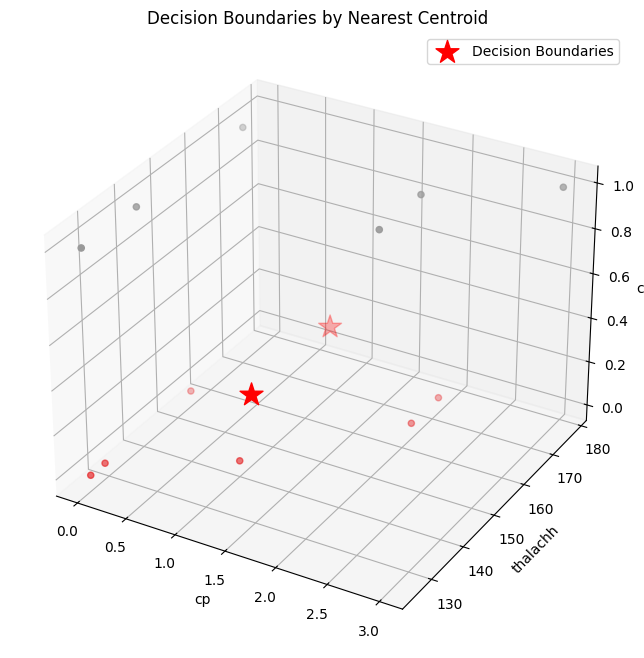

In [1232]:
from mpl_toolkits.mplot3d import Axes3D

# Fit the Nearest Centroid model
nearest_centroid.fit(X_train, y_train)

centroids = nearest_centroid.centroids_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['cp'], X_test['thalachh'], y_test, c=y_test, cmap='Set1')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', s=300, c='r', label='Decision Boundaries')

ax.set_xlabel('cp')
ax.set_ylabel('thalachh')
ax.set_zlabel('caa')
ax.set_title('Decision Boundaries by Nearest Centroid')

plt.legend()
plt.show()


In [1233]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm = LinearSVC(penalty='l1', dual=False, random_state=42)
svm.fit(X_train_scaled, y_train)


predictions_svm = svm.predict(X_test_scaled)


accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f"Accuracy of Linear SVM with L1 regularization: {accuracy_svm}")


Accuracy of Linear SVM with L1 regularization: 0.5833333333333334


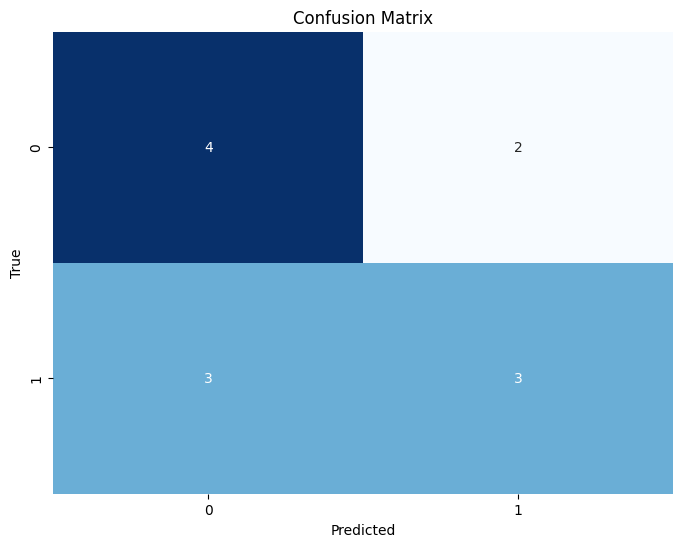

In [1235]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

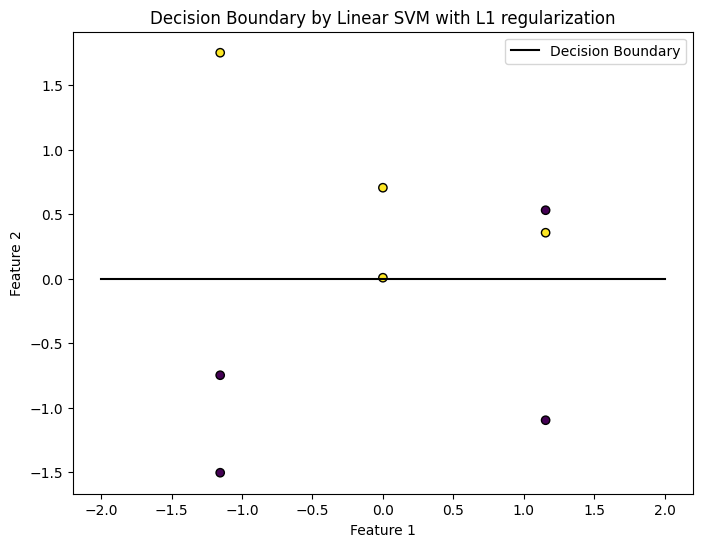

In [1236]:
import matplotlib.pyplot as plt
import numpy as np

X_train_2d = X_train_scaled[:, :2]

svm = LinearSVC(penalty='l1', dual=False, random_state=42)
svm.fit(X_train_2d, y_train)

w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (svm.intercept_[0]) / w[1]

plt.figure(figsize=(8, 6))
plt.plot(xx, yy, 'k-', label="Decision Boundary")
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary by Linear SVM with L1 regularization')
plt.legend()
plt.show()
